In [1]:
from Hand_digits import *

Cost at epoch 0: 9.2069
Cost at epoch 5000: 1.4802
Cost at epoch 10000: 0.6787
Cost at epoch 15000: 0.4619
Cost at epoch 20000: 0.3411
Accuracy for train set: 97.5 %


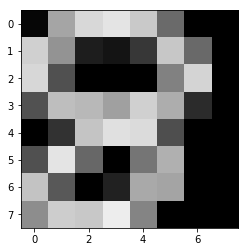

Picture is a 9!


In [9]:
from matplotlib.image import imread

def predict_image(image, params):

    img = image[:, :, 0] * 10
    img = img.reshape(64, 1)

    a_final, _ = forward_prop(img, params)
    res = from_array_to_onehot(a_final)
    
    plt.imshow(image)
    plt.show()

    print('Picture is a {}!'.format(np.argmax(res)))
    

image = imread('/Users/andrea/Desktop/prova8.png')
predict_image(image, parameters)